In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Theme 1: 9 sentences
Keywords: project, rather, work, mostly, many

Theme 2: 19 sentences
Keywords: process, one, mindset, l4, l3

Theme 3: 14 sentences
Keywords: client, lack, people, communication, process

Theme 4: 7 sentences
Keywords: team, lack, need, collaboration, marketing

Theme 5: 10 sentences
Keywords: sales, team, product, within, leaders



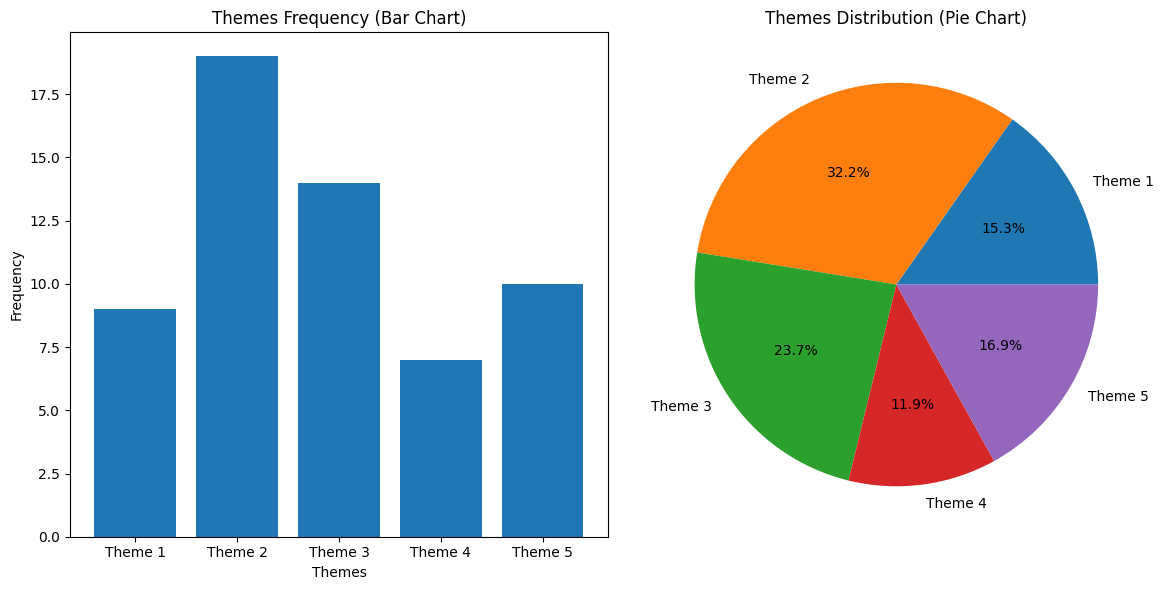

In [ ]:

# Function to preprocess the text
def preprocess_text(text):
    words = word_tokenize(text)
    stop_words = set(stopwords.words("english"))
    filtered_words = [word.lower() for word in words if word.lower() not in stop_words]
    return " ".join(filtered_words)

# Read sentences from CSV or plain text file
def read_sentences(file_path):
    if file_path.endswith(".csv"):
        df = pd.read_csv(file_path)
        # Replace 'your_column_name' with the actual column name in your CSV file.
        sentences = df['challenges'].tolist()  # Replace 'your_column_name'
    else:
        with open(file_path, "r") as file:
            sentences = file.readlines()
    return sentences


# Topic modeling using LDA
def topic_modeling(sentences, num_topics):
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(sentences)
    lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
    lda.fit(X)
    return lda, vectorizer

# Assign sentences to themes based on dominant topics
def assign_sentences_to_themes(lda, vectorizer, sentences):
    theme_sentences = {i: [] for i in range(lda.n_components)}
    for sent in sentences:
        X_sent = vectorizer.transform([sent])
        topic_idx = lda.transform(X_sent).argmax()
        theme_sentences[topic_idx].append(sent)
    return theme_sentences

# Visualize themes using a bar chart and pie chart
def visualize_themes(theme_freq):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.bar(theme_freq.keys(), theme_freq.values())
    plt.xlabel("Themes")
    plt.ylabel("Frequency")
    plt.title("Themes Frequency (Bar Chart)")

    plt.subplot(1, 2, 2)
    plt.pie(theme_freq.values(), labels=theme_freq.keys(), autopct="%1.1f%%")
    plt.title("Themes Distribution (Pie Chart)")

    plt.tight_layout()
    plt.show()

# Extract the most relevant words for each topic
def extract_topic_keywords(lda, vectorizer, num_words=5):
    feature_names = vectorizer.get_feature_names_out()
    topic_keywords = []
    for topic_idx, topic in enumerate(lda.components_):
        top_words_idx = topic.argsort()[-num_words:][::-1]
        top_words = [feature_names[i] for i in top_words_idx]
        topic_keywords.append(top_words)
    return topic_keywords



# Main function
def main():
    nltk.download("punkt")
    nltk.download("stopwords")

    # Replace 'your_file_path.csv' with the path to your CSV file or plain text file.
    file_path = "/content/challenges.csv"
    num_topics = 5  # Number of themes to generate (you can adjust this)

    sentences = read_sentences(file_path)
    preprocessed_sentences = [preprocess_text(sent) for sent in sentences]

    lda, vectorizer = topic_modeling(preprocessed_sentences, num_topics)
    theme_sentences = assign_sentences_to_themes(lda, vectorizer, sentences)
    theme_freq = {f"Theme {i + 1}": len(theme_sentences[i]) for i in range(num_topics)}

    # Extract most relevant words for each topic
    topic_keywords = extract_topic_keywords(lda, vectorizer)

    # Print themes and their most relevant words
    for theme, freq, keywords in zip(theme_freq.keys(), theme_freq.values(), topic_keywords):
        print(f"{theme}: {freq} sentences")
        print("Keywords:", ", ".join(keywords))
        print()

    visualize_themes(theme_freq)

if __name__ == "__main__":
    main()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Theme 1: 14 sentences
Keywords: culture, taking, fun, experiment, learning

Theme 2: 19 sentences
Keywords: work, new, good, life, balance

Theme 3: 16 sentences
Keywords: explore, interest, values, clients, encouragement

Theme 4: 13 sentences
Keywords: people, right, new, leaders, learning

Theme 5: 12 sentences
Keywords: new, l3, l4, technology, team



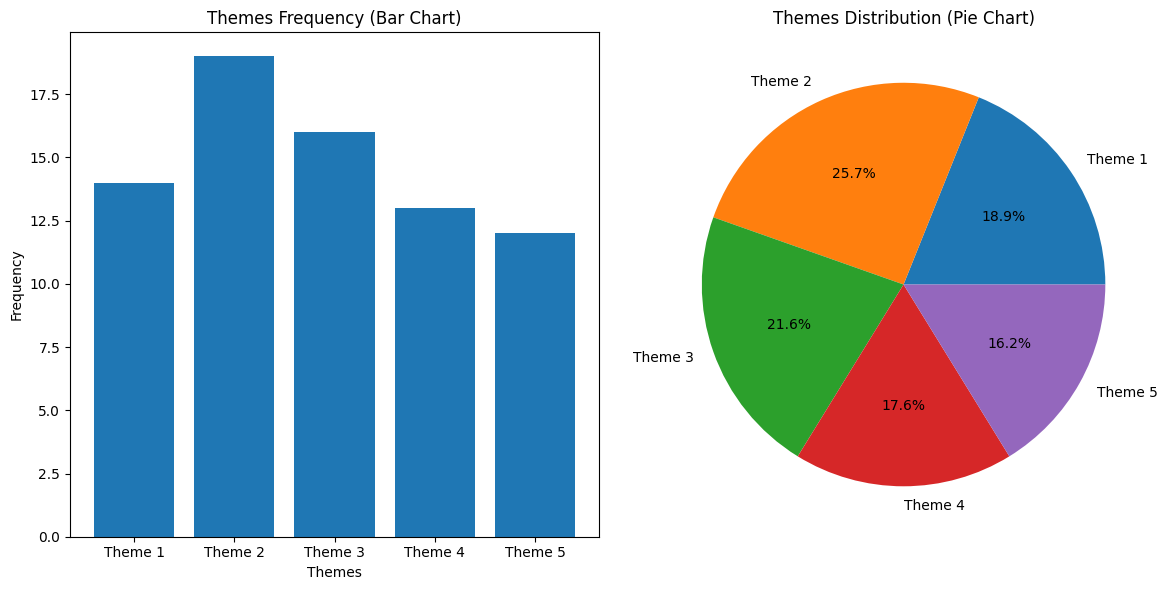

In [ ]:

# Function to preprocess the text
def preprocess_text(text):
    words = word_tokenize(text)
    stop_words = set(stopwords.words("english"))
    filtered_words = [word.lower() for word in words if word.lower() not in stop_words]
    return " ".join(filtered_words)

# Read sentences from CSV or plain text file
def read_sentences(file_path):
    if file_path.endswith(".csv"):
        df = pd.read_csv(file_path)
        # Replace 'your_column_name' with the actual column name in your CSV file.
        sentences = df['going well'].tolist()  # Replace 'your_column_name'
    else:
        with open(file_path, "r") as file:
            sentences = file.readlines()
    return sentences


# Topic modeling using LDA
def topic_modeling(sentences, num_topics):
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(sentences)
    lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
    lda.fit(X)
    return lda, vectorizer

# Assign sentences to themes based on dominant topics
def assign_sentences_to_themes(lda, vectorizer, sentences):
    theme_sentences = {i: [] for i in range(lda.n_components)}
    for sent in sentences:
        X_sent = vectorizer.transform([sent])
        topic_idx = lda.transform(X_sent).argmax()
        theme_sentences[topic_idx].append(sent)
    return theme_sentences

# Visualize themes using a bar chart and pie chart
def visualize_themes(theme_freq):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.bar(theme_freq.keys(), theme_freq.values())
    plt.xlabel("Themes")
    plt.ylabel("Frequency")
    plt.title("Themes Frequency (Bar Chart)")

    plt.subplot(1, 2, 2)
    plt.pie(theme_freq.values(), labels=theme_freq.keys(), autopct="%1.1f%%")
    plt.title("Themes Distribution (Pie Chart)")

    plt.tight_layout()
    plt.show()

# Extract the most relevant words for each topic
def extract_topic_keywords(lda, vectorizer, num_words=5):
    feature_names = vectorizer.get_feature_names_out()
    topic_keywords = []
    for topic_idx, topic in enumerate(lda.components_):
        top_words_idx = topic.argsort()[-num_words:][::-1]
        top_words = [feature_names[i] for i in top_words_idx]
        topic_keywords.append(top_words)
    return topic_keywords



# Main function
def main():
    nltk.download("punkt")
    nltk.download("stopwords")

    # Replace 'your_file_path.csv' with the path to your CSV file or plain text file.
    file_path = "/content/going well.csv"
    num_topics = 5  # Number of themes to generate (you can adjust this)

    sentences = read_sentences(file_path)
    preprocessed_sentences = [preprocess_text(sent) for sent in sentences]

    lda, vectorizer = topic_modeling(preprocessed_sentences, num_topics)
    theme_sentences = assign_sentences_to_themes(lda, vectorizer, sentences)
    theme_freq = {f"Theme {i + 1}": len(theme_sentences[i]) for i in range(num_topics)}

    # Extract most relevant words for each topic
    topic_keywords = extract_topic_keywords(lda, vectorizer)

    # Print themes and their most relevant words
    for theme, freq, keywords in zip(theme_freq.keys(), theme_freq.values(), topic_keywords):
        print(f"{theme}: {freq} sentences")
        print("Keywords:", ", ".join(keywords))
        print()

    visualize_themes(theme_freq)

if __name__ == "__main__":
    main()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Theme 1: 16 sentences
Keywords: team, lead, generation, profile, build

Theme 2: 19 sentences
Keywords: resources, based, tech, process, clients

Theme 3: 12 sentences
Keywords: l3, high, one, partners, resources

Theme 4: 15 sentences
Keywords: enterprise, sales, new, relationship, business

Theme 5: 10 sentences
Keywords: sales, capabilities, lead, events, try



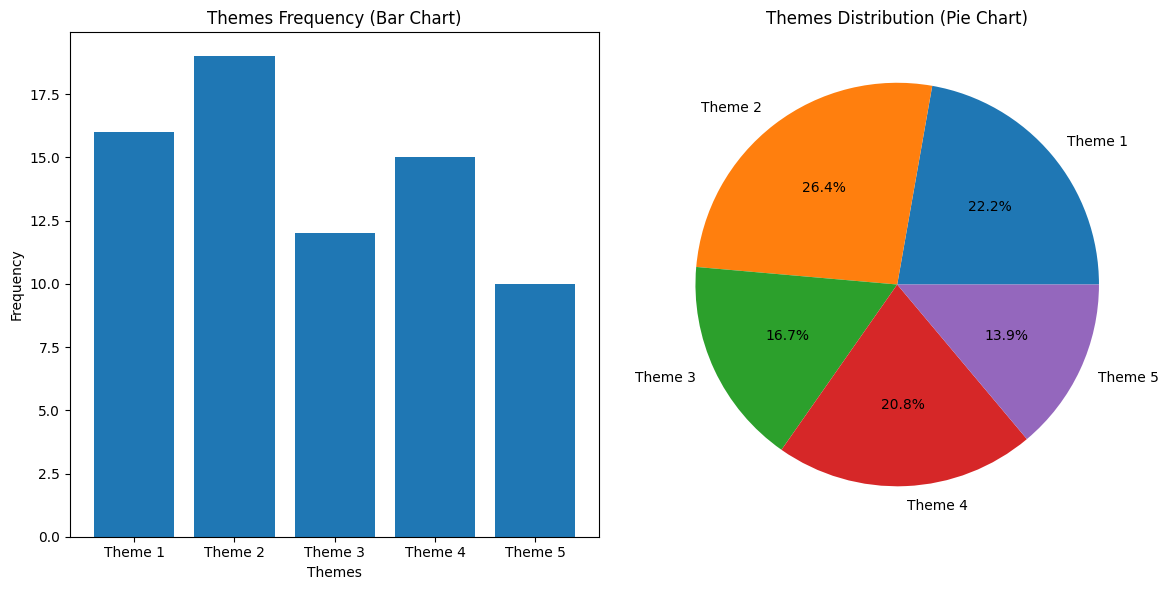

In [ ]:

# Function to preprocess the text
def preprocess_text(text):
    words = word_tokenize(text)
    stop_words = set(stopwords.words("english"))
    filtered_words = [word.lower() for word in words if word.lower() not in stop_words]
    return " ".join(filtered_words)

# Read sentences from CSV or plain text file
def read_sentences(file_path):
    if file_path.endswith(".csv"):
        df = pd.read_csv(file_path)
        # Replace 'your_column_name' with the actual column name in your CSV file.
        sentences = df['idea'].tolist()  # Replace 'your_column_name'
    else:
        with open(file_path, "r") as file:
            sentences = file.readlines()
    return sentences


# Topic modeling using LDA
def topic_modeling(sentences, num_topics):
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(sentences)
    lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
    lda.fit(X)
    return lda, vectorizer

# Assign sentences to themes based on dominant topics
def assign_sentences_to_themes(lda, vectorizer, sentences):
    theme_sentences = {i: [] for i in range(lda.n_components)}
    for sent in sentences:
        X_sent = vectorizer.transform([sent])
        topic_idx = lda.transform(X_sent).argmax()
        theme_sentences[topic_idx].append(sent)
    return theme_sentences

# Visualize themes using a bar chart and pie chart
def visualize_themes(theme_freq):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.bar(theme_freq.keys(), theme_freq.values())
    plt.xlabel("Themes")
    plt.ylabel("Frequency")
    plt.title("Themes Frequency (Bar Chart)")

    plt.subplot(1, 2, 2)
    plt.pie(theme_freq.values(), labels=theme_freq.keys(), autopct="%1.1f%%")
    plt.title("Themes Distribution (Pie Chart)")

    plt.tight_layout()
    plt.show()

# Extract the most relevant words for each topic
def extract_topic_keywords(lda, vectorizer, num_words=5):
    feature_names = vectorizer.get_feature_names_out()
    topic_keywords = []
    for topic_idx, topic in enumerate(lda.components_):
        top_words_idx = topic.argsort()[-num_words:][::-1]
        top_words = [feature_names[i] for i in top_words_idx]
        topic_keywords.append(top_words)
    return topic_keywords



# Main function
def main():
    nltk.download("punkt")
    nltk.download("stopwords")

    # Replace 'your_file_path.csv' with the path to your CSV file or plain text file.
    file_path = "/content/idea.csv"
    num_topics = 5  # Number of themes to generate (you can adjust this)

    sentences = read_sentences(file_path)
    preprocessed_sentences = [preprocess_text(sent) for sent in sentences]

    lda, vectorizer = topic_modeling(preprocessed_sentences, num_topics)
    theme_sentences = assign_sentences_to_themes(lda, vectorizer, sentences)
    theme_freq = {f"Theme {i + 1}": len(theme_sentences[i]) for i in range(num_topics)}

    # Extract most relevant words for each topic
    topic_keywords = extract_topic_keywords(lda, vectorizer)

    # Print themes and their most relevant words
    for theme, freq, keywords in zip(theme_freq.keys(), theme_freq.values(), topic_keywords):
        print(f"{theme}: {freq} sentences")
        print("Keywords:", ", ".join(keywords))
        print()

    visualize_themes(theme_freq)

if __name__ == "__main__":
    main()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Theme 1: 9 sentences
Keywords: project, rather, work, mostly, many
Theme Name: not in rather

Theme 2: 19 sentences
Keywords: process, one, mindset, l4, l3
Theme Name: the in not

Theme 3: 14 sentences
Keywords: client, lack, people, communication, process
Theme Name: not of client

Theme 4: 7 sentences
Keywords: team, lack, need, collaboration, marketing
Theme Name: team ( we

Theme 5: 10 sentences
Keywords: sales, team, product, within, leaders
Theme Name: for no team



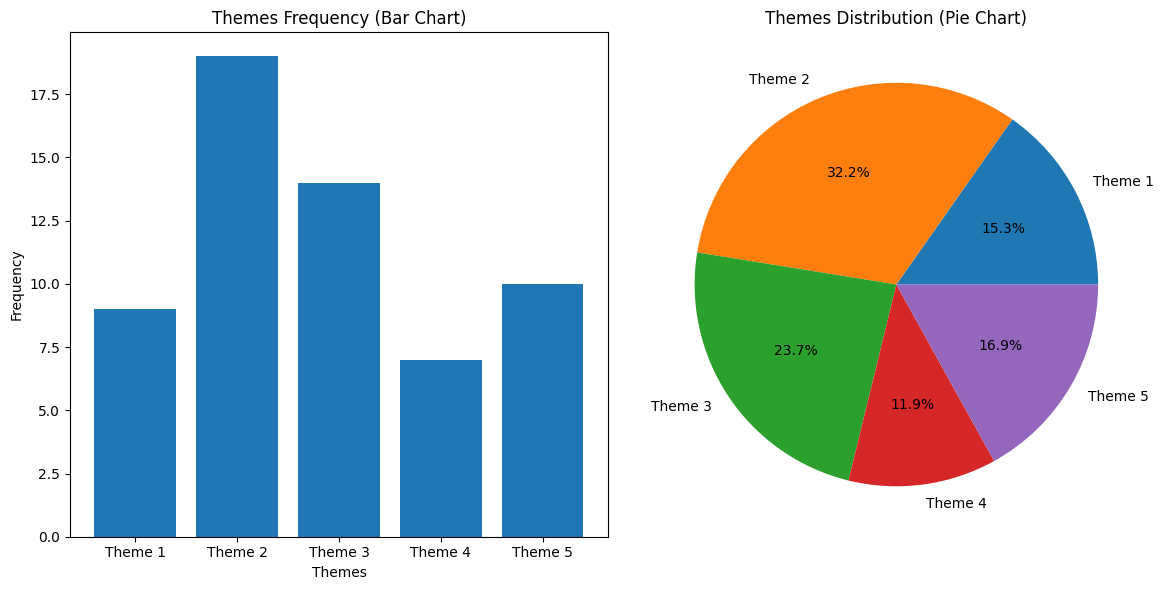

In [ ]:

# Function to preprocess the text
def preprocess_text(text):
    words = word_tokenize(text)
    stop_words = set(stopwords.words("english"))
    filtered_words = [word.lower() for word in words if word.lower() not in stop_words]
    return " ".join(filtered_words)

# Read sentences from CSV or plain text file
def read_sentences(file_path):
    if file_path.endswith(".csv"):
        df = pd.read_csv(file_path)
        # Replace 'your_column_name' with the actual column name in your CSV file.
        sentences = df['challenges'].tolist()  # Replace 'your_column_name'
    else:
        with open(file_path, "r") as file:
            sentences = file.readlines()
    return sentences


# Topic modeling using LDA
def topic_modeling(sentences, num_topics):
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(sentences)
    lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
    lda.fit(X)
    return lda, vectorizer

# Assign sentences to themes based on dominant topics
def assign_sentences_to_themes(lda, vectorizer, sentences):
    theme_sentences = {i: [] for i in range(lda.n_components)}
    for sent in sentences:
        X_sent = vectorizer.transform([sent])
        topic_idx = lda.transform(X_sent).argmax()
        theme_sentences[topic_idx].append(sent)
    return theme_sentences

# Visualize themes using a bar chart and pie chart
def visualize_themes(theme_freq):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.bar(theme_freq.keys(), theme_freq.values())
    plt.xlabel("Themes")
    plt.ylabel("Frequency")
    plt.title("Themes Frequency (Bar Chart)")

    plt.subplot(1, 2, 2)
    plt.pie(theme_freq.values(), labels=theme_freq.keys(), autopct="%1.1f%%")
    plt.title("Themes Distribution (Pie Chart)")

    plt.tight_layout()
    plt.show()

# Extract the most relevant words for each topic
def extract_topic_keywords(lda, vectorizer, num_words=5):
    feature_names = vectorizer.get_feature_names_out()
    topic_keywords = []
    for topic_idx, topic in enumerate(lda.components_):
        top_words_idx = topic.argsort()[-num_words:][::-1]
        top_words = [feature_names[i] for i in top_words_idx]
        topic_keywords.append(top_words)
    return topic_keywords

# Generate theme names based on sentence content
def generate_theme_names(theme_sentences, num_words=3):
    theme_names = []
    for sentences in theme_sentences.values():
        words = []
        for sent in sentences:
            words.extend(word_tokenize(sent.lower()))
        fdist = FreqDist(words)
        top_words = [word for word, _ in fdist.most_common(num_words)]
        theme_names.append(" ".join(top_words))
    return theme_names

# Main function
def main():
    nltk.download("punkt")
    nltk.download("stopwords")

    # Replace 'your_file_path.csv' with the path to your CSV file or plain text file.
    file_path = "/content/challenges.csv"
    num_topics = 5  # Number of themes to generate (you can adjust this)

    sentences = read_sentences(file_path)
    preprocessed_sentences = [preprocess_text(sent) for sent in sentences]

    lda, vectorizer = topic_modeling(preprocessed_sentences, num_topics)
    theme_sentences = assign_sentences_to_themes(lda, vectorizer, sentences)
    theme_freq = {f"Theme {i + 1}": len(theme_sentences[i]) for i in range(num_topics)}

    # Extract most relevant words for each topic
    topic_keywords = extract_topic_keywords(lda, vectorizer)

    # Generate theme names based on sentence content
    theme_names = generate_theme_names(theme_sentences)

    # Print themes and their most relevant words
    for theme, freq, keywords, name in zip(theme_freq.keys(), theme_freq.values(), topic_keywords, theme_names):
        print(f"{theme}: {freq} sentences")
        print("Keywords:", ", ".join(keywords))
        print("Theme Name:", name)
        print()

    visualize_themes(theme_freq)

if __name__ == "__main__":
    main()

In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Function to preprocess the text
def preprocess_text(text):
    words = word_tokenize(text)
    stop_words = set(stopwords.words("english"))
    filtered_words = [word.lower() for word in words if word.lower() not in stop_words]
    return " ".join(filtered_words)

# Read sentences from CSV or plain text file
def read_sentences(file_path):
    if file_path.endswith(".csv"):
        df = pd.read_csv(file_path)
        # Replace 'your_column_name' with the actual column name in your CSV file.
        sentences = df['challenges'].tolist()  # Replace 'your_column_name'
    else:
        with open(file_path, "r") as file:
            sentences = file.readlines()
    return sentences

# TF-IDF vectorization
def tfidf_vectorization(sentences):
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform(sentences)
    return tfidf_matrix, tfidf_vectorizer

# K-means clustering
def kmeans_clustering(tfidf_matrix, num_clusters):
    km = KMeans(n_clusters=num_clusters, random_state=42)
    km.fit(tfidf_matrix)
    return km.labels_

# Generate theme names based on clustering results
def generate_theme_names(sentences, num_clusters):
    tfidf_matrix, tfidf_vectorizer = tfidf_vectorization(sentences)
    cluster_labels = kmeans_clustering(tfidf_matrix, num_clusters)
    theme_names = {}

    for i in range(num_clusters):
        cluster_sentences = [sentences[j] for j in range(len(sentences)) if cluster_labels[j] == i]
        theme_names[f"Theme {i + 1}"] = cluster_sentences

    return theme_names

# Main function
def main():
    nltk.download("punkt")
    nltk.download("stopwords")

    # Replace 'your_file_path.csv' with the path to your CSV file or plain text file.
    file_path = "challenges.csv"
    num_clusters = 5  # Number of themes to generate (you can adjust this)

    sentences = read_sentences(file_path)
    preprocessed_sentences = [preprocess_text(sent) for sent in sentences]

    theme_names = generate_theme_names(sentences, num_clusters)

    print("Based on the provided text, the issues and challenges can be summarized into the following themes:")
    for theme, sentences in theme_names.items():
        print(f"{theme}:")
        for sent in sentences:
            print("-", sent)
        print()

if __name__ == "__main__":
    main()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Based on the provided text, the issues and challenges can be summarized into the following themes:
Theme 1:
- Lack of due deligence with client interactions
- Haven't developed a project that competes in the market
- Lack of collaboration between L3/L4 across the chapters
- Lack of communication both internal and external
- L3 & L4 involvement in terms of marketing activities
- We were too late in marketing our capabilities
- Need to still refine our digital marketing strategies/capabilities
- Tight project schedule will create impact in upskill
- Strict in process- Not analyxing the need
- Lack of experience

Theme 2:
- Lack of sales partners & "Door knocking" team
- Open up for cross team appreciation
- Proper coordination with sales and engineering team
- Cross team collaboration
- Process not followers by some business unit - one team
one culture is missing
- Stop muscling and fight as one team with shares responsibilities

Theme 3:
- No direct/travel for makrketing/sales visit for

In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Function to preprocess the text
def preprocess_text(text):
    words = word_tokenize(text)
    stop_words = set(stopwords.words("english"))
    filtered_words = [word.lower() for word in words if word.lower() not in stop_words]
    return " ".join(filtered_words)

# Read sentences from CSV or plain text file
def read_sentences(file_path):
    if file_path.endswith(".csv"):
        df = pd.read_csv(file_path)
        # Replace 'your_column_name' with the actual column name in your CSV file.
        sentences = df['challenges'].tolist()  # Replace 'your_column_name'
    else:
        with open(file_path, "r") as file:
            sentences = file.readlines()
    return sentences

# TF-IDF vectorization
def tfidf_vectorization(sentences):
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform(sentences)
    return tfidf_matrix, tfidf_vectorizer

# K-means clustering
def kmeans_clustering(tfidf_matrix, num_clusters):
    km = KMeans(n_clusters=num_clusters, random_state=42)
    km.fit(tfidf_matrix)
    return km.labels_

# Generate theme names based on clustering results
def generate_theme_names(sentences, num_clusters):
    tfidf_matrix, tfidf_vectorizer = tfidf_vectorization(sentences)
    cluster_labels = kmeans_clustering(tfidf_matrix, num_clusters)
    theme_names = {}

    for i in range(num_clusters):
        cluster_sentences = [sentences[j] for j in range(len(sentences)) if cluster_labels[j] == i]
        theme_names[f"Theme {i + 1}"] = cluster_sentences

    return theme_names

# Main function
def main():
    nltk.download("punkt")
    nltk.download("stopwords")

    # Replace 'your_file_path.csv' with the path to your CSV file or plain text file.
    file_path = "challenges.csv"
    num_clusters = 5  # Number of themes to generate (you can adjust this)

    sentences = read_sentences(file_path)
    preprocessed_sentences = [preprocess_text(sent) for sent in sentences]

    theme_names = generate_theme_names(sentences, num_clusters)

    print("Based on the provided text, the issues and challenges can be summarized into the following themes:")
    for theme, sentences in theme_names.items():
        print(f"{theme}:")
        for sent in sentences:
            print("-", sent)
        print()

if __name__ == "__main__":
    main()


Based on the provided text, the issues and challenges can be summarized into the following themes:
Theme 1:
- Lack of due deligence with client interactions
- Haven't developed a project that competes in the market
- Lack of collaboration between L3/L4 across the chapters
- Lack of communication both internal and external
- L3 & L4 involvement in terms of marketing activities
- We were too late in marketing our capabilities
- Need to still refine our digital marketing strategies/capabilities
- Tight project schedule will create impact in upskill
- Strict in process- Not analyxing the need
- Lack of experience

Theme 2:
- Lack of sales partners & "Door knocking" team
- Open up for cross team appreciation
- Proper coordination with sales and engineering team
- Cross team collaboration
- Process not followers by some business unit - one team
one culture is missing
- Stop muscling and fight as one team with shares responsibilities

Theme 3:
- No direct/travel for makrketing/sales visit for

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Function to preprocess the text
def preprocess_text(text):
    words = word_tokenize(text)
    stop_words = set(stopwords.words("english"))
    filtered_words = [word.lower() for word in words if word.lower() not in stop_words]
    return " ".join(filtered_words)

# Read sentences from CSV or plain text file
def read_sentences(file_path):
    if file_path.endswith(".csv"):
        df = pd.read_csv(file_path)
        # Replace 'your_column_name' with the actual column name in your CSV file.
        sentences = df['challenges'].tolist()  # Replace 'your_column_name'
    else:
        with open(file_path, "r") as file:
            sentences = file.readlines()
    return sentences

# TF-IDF vectorization
def tfidf_vectorization(sentences):
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform(sentences)
    return tfidf_matrix, tfidf_vectorizer

# K-means clustering
def kmeans_clustering(tfidf_matrix, num_clusters):
    km = KMeans(n_clusters=num_clusters, random_state=42)
    km.fit(tfidf_matrix)
    return km.labels_

# Generate theme names based on clustering results and keywords
def generate_theme_names(sentences, num_clusters):
    tfidf_matrix, tfidf_vectorizer = tfidf_vectorization(sentences)
    cluster_labels = kmeans_clustering(tfidf_matrix, num_clusters)
    theme_names = {}

    for i in range(num_clusters):
        cluster_sentences = [sentences[j] for j in range(len(sentences)) if cluster_labels[j] == i]
        keywords_matrix = tfidf_vectorizer.transform(cluster_sentences)
        keywords = tfidf_vectorizer.get_feature_names_out()[keywords_matrix.sum(axis=0).argmax()]
        theme_name = " ".join(keywords.split())
        theme_names[theme_name] = cluster_sentences

    return theme_names

# Main function
def main():
    nltk.download("punkt")
    nltk.download("stopwords")

    # Replace 'your_file_path.csv' with the path to your CSV file or plain text file.
    file_path = "challenges.csv"
    num_clusters = 5  # Number of themes to generate (you can adjust this)

    sentences = read_sentences(file_path)
    preprocessed_sentences = [preprocess_text(sent) for sent in sentences]

    theme_names = generate_theme_names(sentences, num_clusters)

    print("Based on the provided text, the issues and challenges can be summarized into the following themes:")
    for theme_name, sentences in theme_names.items():
        print(f"{theme_name}:")
        for sent in sentences:
            print("-", sent)
        print()

if __name__ == "__main__":
    main()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Based on the provided text, the issues and challenges can be summarized into the following themes:
of:
- Lack of due deligence with client interactions
- Haven't developed a project that competes in the market
- Lack of collaboration between L3/L4 across the chapters
- Lack of communication both internal and external
- L3 & L4 involvement in terms of marketing activities
- We were too late in marketing our capabilities
- Need to still refine our digital marketing strategies/capabilities
- Tight project schedule will create impact in upskill
- Strict in process- Not analyxing the need
- Lack of experience

team:
- Lack of sales partners & "Door knocking" team
- Open up for cross team appreciation
- Proper coordination with sales and engineering team
- Cross team collaboration
- Process not followers by some business unit - one team
one culture is missing
- Stop muscling and fight as one team with shares responsibilities

not:
- No direct/travel for makrketing/sales visit for opportuniti

In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Function to preprocess the text
def preprocess_text(text):
    words = word_tokenize(text)
    stop_words = set(stopwords.words("english"))
    filtered_words = [word.lower() for word in words if word.lower() not in stop_words]
    return " ".join(filtered_words)

# Read sentences from CSV or plain text file
def read_sentences(file_path):
    if file_path.endswith(".csv"):
        df = pd.read_csv(file_path)
        # Replace 'your_column_name' with the actual column name in your CSV file.
        sentences = df['challenges'].tolist()  # Replace 'your_column_name'
    else:
        with open(file_path, "r") as file:
            sentences = file.readlines()
    return sentences


# TF-IDF vectorization
def tfidf_vectorization(sentences):
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform(sentences)
    return tfidf_matrix, tfidf_vectorizer

# K-means clustering
def kmeans_clustering(tfidf_matrix, num_clusters):
    km = KMeans(n_clusters=num_clusters, random_state=42)
    km.fit(tfidf_matrix)
    return km.labels_

# Generate theme names based on the most relevant keywords
def generate_theme_names(sentences, num_clusters):
    tfidf_matrix, tfidf_vectorizer = tfidf_vectorization(sentences)
    cluster_labels = kmeans_clustering(tfidf_matrix, num_clusters)
    theme_names = {}

    for i in range(num_clusters):
        cluster_sentences = [sentences[j] for j in range(len(sentences)) if cluster_labels[j] == i]
        keywords_matrix = tfidf_vectorizer.transform(cluster_sentences)
        keywords = tfidf_vectorizer.get_feature_names_out()[keywords_matrix.sum(axis=0).argmax()]
        theme_name = " ".join(keywords.split())
        theme_names[theme_name] = cluster_sentences

    return theme_names

# Main function
def main():
    nltk.download("punkt")
    nltk.download("stopwords")

    # Replace 'your_file_path.csv' with the path to your CSV file or plain text file.
    file_path = "challenges.csv"
    num_clusters = 5  # Number of themes to generate (you can adjust this)

    sentences = read_sentences(file_path)
    preprocessed_sentences = [preprocess_text(sent) for sent in sentences]

    theme_names = generate_theme_names(sentences, num_clusters)

    print("Based on the provided text, the issues and challenges can be summarized into the following themes:")
    for theme_name, sentences in theme_names.items():
        print(f"{theme_name.capitalize()}:")
        for sent in sentences:
            print("-", sent)
        print()

if __name__ == "__main__":
    main()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Based on the provided text, the issues and challenges can be summarized into the following themes:
Of:
- Lack of due deligence with client interactions
- Haven't developed a project that competes in the market
- Lack of collaboration between L3/L4 across the chapters
- Lack of communication both internal and external
- L3 & L4 involvement in terms of marketing activities
- We were too late in marketing our capabilities
- Need to still refine our digital marketing strategies/capabilities
- Tight project schedule will create impact in upskill
- Strict in process- Not analyxing the need
- Lack of experience

Team:
- Lack of sales partners & "Door knocking" team
- Open up for cross team appreciation
- Proper coordination with sales and engineering team
- Cross team collaboration
- Process not followers by some business unit - one team
one culture is missing
- Stop muscling and fight as one team with shares responsibilities

Not:
- No direct/travel for makrketing/sales visit for opportuniti

In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt

# Function to preprocess the text
def preprocess_text(text):
    words = word_tokenize(text)
    stop_words = set(stopwords.words("english"))
    filtered_words = [word.lower() for word in words if word.lower() not in stop_words]
    return " ".join(filtered_words)

# Read sentences from CSV or plain text file
def read_sentences(file_path):
    if file_path.endswith(".csv"):
        df = pd.read_csv(file_path)
        # Replace 'your_column_name' with the actual column name in your CSV file.
        sentences = df['challenges'].tolist()  # Replace 'your_column_name'
    else:
        with open(file_path, "r") as file:
            sentences = file.readlines()
    return sentences
# Bag-of-words vectorization
def bow_vectorization(sentences):
    vectorizer = CountVectorizer()
    bow_matrix = vectorizer.fit_transform(sentences)
    return bow_matrix, vectorizer

# Latent Dirichlet Allocation (LDA)
def perform_lda(bow_matrix, num_topics):
    lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
    lda.fit(bow_matrix)
    return lda

# Extract the most relevant words for each topic
def extract_topic_keywords(lda, vectorizer, num_words=5):
    topic_keywords = []
    for topic_idx, topic in enumerate(lda.components_):
        top_words_idx = topic.argsort()[-num_words:][::-1]
        top_words = [vectorizer.get_feature_names_out()[i] for i in top_words_idx]
        topic_keywords.append(top_words)
    return topic_keywords

# Generate theme names based on topic keywords
def generate_theme_names(topic_keywords):
    theme_names = []
    for idx, keywords in enumerate(topic_keywords):
        theme_name = " ".join(keywords)
        theme_names.append(f"Theme {idx + 1}: {theme_name}")
    return theme_names

# Main function
def main():
    nltk.download("punkt")
    nltk.download("stopwords")

    # Replace 'your_file_path.csv' with the path to your CSV file or plain text file.
    file_path = "challenges.csv"
    num_topics = 5  # Number of themes to generate (you can adjust this)

    sentences = read_sentences(file_path)
    preprocessed_sentences = [preprocess_text(sent) for sent in sentences]

    bow_matrix, vectorizer = bow_vectorization(preprocessed_sentences)
    lda = perform_lda(bow_matrix, num_topics)
    topic_keywords = extract_topic_keywords(lda, vectorizer)
    theme_names = generate_theme_names(topic_keywords)

    print("Based on the provided text, the issues and challenges can be summarized into the following themes:")
    for theme_name, sentences in zip(theme_names, topic_keywords):
        print(theme_name)
        for keyword in sentences:
            print("-", keyword)
        print()

if __name__ == "__main__":
    main()


Based on the provided text, the issues and challenges can be summarized into the following themes:
Theme 1: project rather work mostly many
- project
- rather
- work
- mostly
- many

Theme 2: process one mindset l4 l3
- process
- one
- mindset
- l4
- l3

Theme 3: client lack people communication process
- client
- lack
- people
- communication
- process

Theme 4: team lack need collaboration marketing
- team
- lack
- need
- collaboration
- marketing

Theme 5: sales team product within leaders
- sales
- team
- product
- within
- leaders



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt

# Function to preprocess the text
def preprocess_text(text):
    words = word_tokenize(text)
    stop_words = set(stopwords.words("english"))
    filtered_words = [word.lower() for word in words if word.lower() not in stop_words]
    return " ".join(filtered_words)

# Read sentences from CSV or plain text file
def read_sentences(file_path):
    if file_path.endswith(".csv"):
        df = pd.read_csv(file_path)
        # Replace 'your_column_name' with the actual column name in your CSV file.
        sentences = df['challenges'].tolist()  # Replace 'your_column_name'
    else:
        with open(file_path, "r") as file:
            sentences = file.readlines()
    return sentences
# Bag-of-words vectorization
def bow_vectorization(sentences):
    vectorizer = CountVectorizer()
    bow_matrix = vectorizer.fit_transform(sentences)
    return bow_matrix, vectorizer

# Latent Dirichlet Allocation (LDA)
def perform_lda(bow_matrix, num_topics):
    lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
    lda.fit(bow_matrix)
    return lda

# Extract the most relevant words for each topic
def extract_topic_keywords(lda, vectorizer, num_words=5):
    topic_keywords = []
    for topic_idx, topic in enumerate(lda.components_):
        top_words_idx = topic.argsort()[-num_words:][::-1]
        top_words = [vectorizer.get_feature_names_out()[i] for i in top_words_idx]
        topic_keywords.append(top_words)
    return topic_keywords

# Generate theme names based on topic keywords
def generate_theme_names(topic_keywords):
    theme_names = []
    for idx, keywords in enumerate(topic_keywords):
        theme_name = " ".join(keywords)
        theme_names.append(f"Theme {idx + 1}: {theme_name}")
    return theme_names

# Main function
def main():
    nltk.download("punkt")
    nltk.download("stopwords")

    # Replace 'your_file_path.csv' with the path to your CSV file or plain text file.
    file_path = "challenges.csv"
    num_topics = 9  # Number of themes to generate (you can adjust this)

    sentences = read_sentences(file_path)
    preprocessed_sentences = [preprocess_text(sent) for sent in sentences]

    bow_matrix, vectorizer = bow_vectorization(preprocessed_sentences)
    lda = perform_lda(bow_matrix, num_topics)
    topic_keywords = extract_topic_keywords(lda, vectorizer)
    theme_names = generate_theme_names(topic_keywords)

    print("Based on the provided text, the issues and challenges can be summarized into the following themes:")
    for theme_name, sentences in zip(theme_names, topic_keywords):
        print(theme_name)
        for keyword in sentences:
            print("-", keyword)
        print()

if __name__ == "__main__":
    main()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Based on the provided text, the issues and challenges can be summarized into the following themes:
Theme 1: project mostly rather create impact
- project
- mostly
- rather
- create
- impact

Theme 2: lack team project sales knocking
- lack
- team
- project
- sales
- knocking

Theme 3: lack sometimes communication many team
- lack
- sometimes
- communication
- many
- team

Theme 4: marketing work l3 l4 cross
- marketing
- work
- l3
- l4
- cross

Theme 5: product within meeting conversion units
- product
- within
- meeting
- conversion
- units

Theme 6: process people capabilities need ca
- process
- people
- capabilities
- need
- ca

Theme 7: people lack project leaders collaboration
- people
- lack
- project
- leaders
- collaboration

Theme 8: client definition technology zone thing
- client
- definition
- technology
- zone
- thing

Theme 9: mindset process one change team
- mindset
- process
- one
- change
- team

